In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


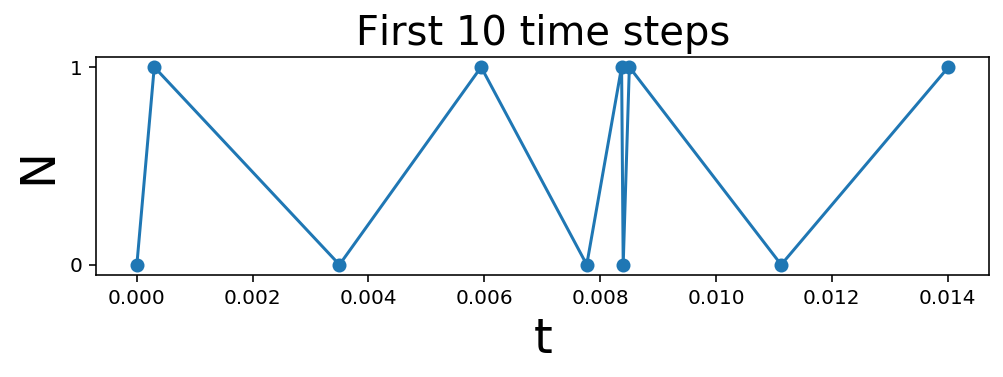

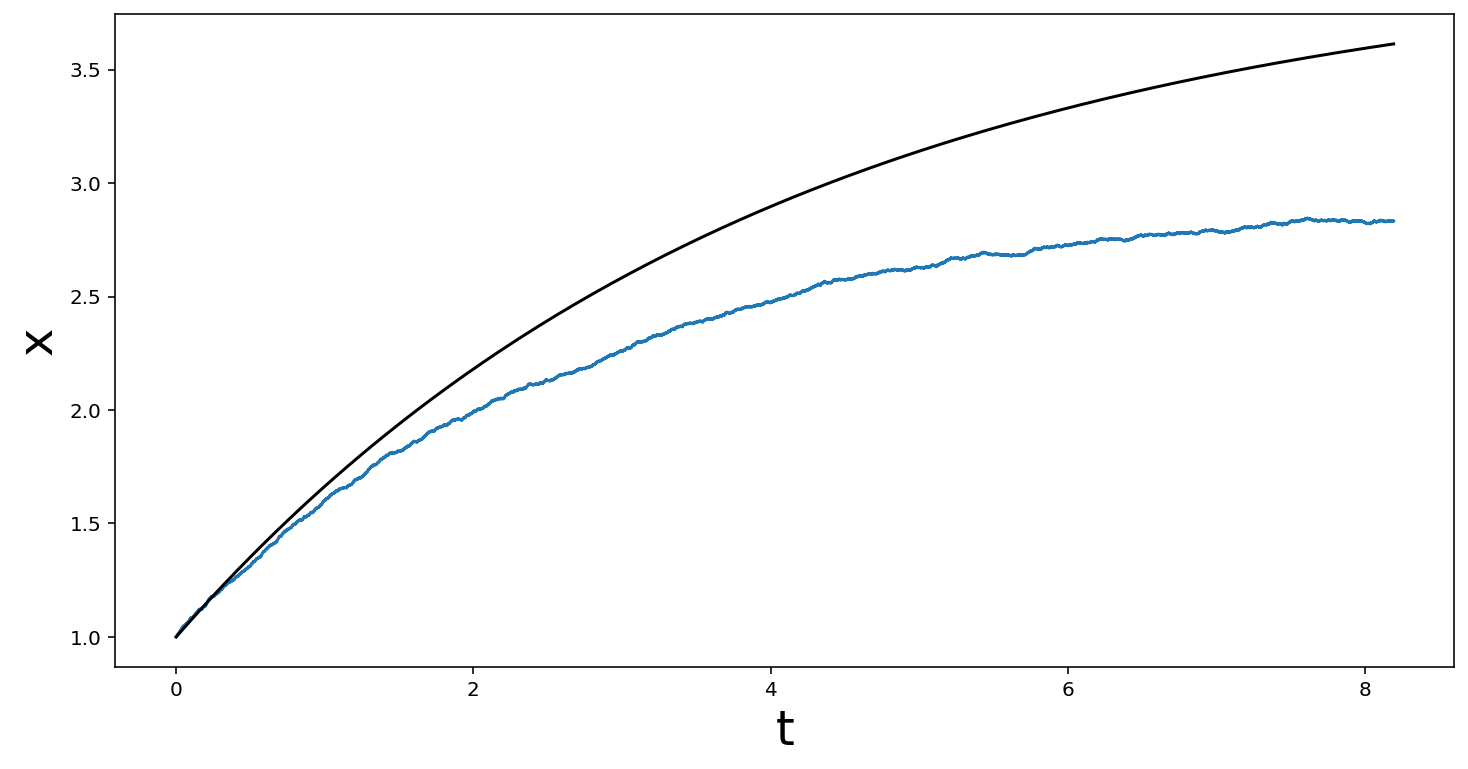

In [2]:
epsilon = 0.001
gamma = 2.
delta = 0.25
alpha = 1.
beta = 1.
n0 = 0
x0 = 1
Nsteps = 10000
N = zeros(Nsteps)
N[0] = n0
X = zeros(Nsteps)
X[0] = x0
T = zeros(Nsteps)
T[0] = 0
for j in arange(1, Nsteps):
    x = X[j-1]
    u = rand(1)[0]
    rate = beta*sqrt(x)/epsilon if N[j-1]==1 else alpha/epsilon
    tau = -log(u)/rate
    T[j] = T[j-1] + tau
    N[j] = 0 if N[j-1]==1 else 1
    ## update x using the exact solution above
    X[j] = X[j-1]*exp(-delta*tau) + gamma*N[j-1]/delta*(1 - exp(-delta*tau))

## I wan't to make a plot for the limiting ODE solution
Tinf = linspace(0, T[-1], 200)
Navg = alpha/(alpha + beta)
Xinf = x0*exp(-delta*Tinf) + gamma*Navg/delta*(1 - exp(-delta*Tinf))


figure(1, [8, 2])
plot(T[:10], N[:10], '-o')
yticks([0, 1])
title('First 10 time steps', fontsize=20)
xlabel('t', fontsize=24)
ylabel('N', fontsize=24);

figure(3, [12, 6])
plot(T, X)
plot(Tinf, Xinf, 'k')
xlabel('t', fontsize=24)
ylabel('x', fontsize=24);